Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

Lambda School Data Science, Unit 2: Predictive Modeling

# REGRESSION AND CLASSIFICATION MODULE 1 ASSIGNMENT

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

In [0]:
# another way to import a csv file from github.
import os, sys
in_colab = 'google.colab' in sys.modules
# if you're in Colab...
if in_colab:
    # pull files from Github repo.
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    # install required python packages.
    !pip install -r requirements.txt    
    # change into directory for module.
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 17.31 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (41/41), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 112kB 15.0MB/s 
     |████████████████████████████████| 133kB 49.9MB/s 
     |████████████████████████████████| 57.7MB 1.4MB/s 
     |████████████████████████████████| 7.1MB 33.3MB/s 
     |████████████████████████████████| 235kB 42.5MB/s 
     |████████████████████████████████| 614kB 35.1MB/s 
     |████████████████████████████████| 225kB 40.6MB/s 
     |████████████████████████████████| 768kB 39.3MB/s 
     |████████████████████████████████| 51kB 18.0MB/s 
     |█████████

In [0]:
# ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# import pandas.
import pandas as pd
# import pandas_profiling.
import pandas_profiling

In [0]:
# label and read in the New York City apartment rental listing data.
df = pd.read_csv('../data/renthop-nyc.csv')
# set the shape we want.
assert df.shape == (49352, 34)

In [0]:
# show the data frame 'profile report'.
df.profile_report()

In [0]:
# show the data frame with header (1).
df.head(1)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Price Target.

In [0]:
# change the 'price' float column to have a ','' for thousands & 0 decimals. 
pd.options.display.float_format = '{:,.0f}'.format
# show the statistics of the data.
df['price'].describe()

count      49,352
mean        3,830
std        22,067
min            43
25%         2,500
50%         3,150
75%         4,100
max     4,490,000
Name: price, dtype: float64

In [0]:
# import seaborn library.
import seaborn as sns

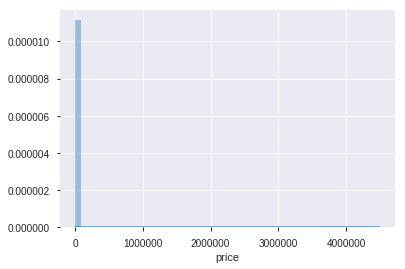

In [0]:
# the mean price is 3,830, what is this $4,490,000?
# pot the distribution for 'price'.
sns.distplot(df['price'])

In [0]:
# the mean price is 3,830, what is this $43?
# anything under $1,000 seems to be mainly bad listing, we can remove them as outliers.
# show the 'price' data < 1000.
df.query('price < 1000')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
1236,1,0,2016-04-12 03:48:49,,Marshall Street,41,-74,695,12 Marshall Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4020,1,1,2016-04-27 19:17:48,1bdr in a 3 bdr apartment for short term with ...,2501 ditmars blvd,41,-74,800,2501 ditmars blvd,high,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5942,1,0,2016-04-13 04:20:52,,Marshall Street,41,-74,695,12 Marshall Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5966,1,0,2016-04-06 05:24:27,,Marshall Street,41,-74,695,12 Marshall Street,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6850,1,0,2016-04-06 03:33:13,,Seagirt Blvd,41,-74,999,20-10 Seagirt Blvd,medium,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7654,1,1,2016-04-14 03:39:47,"Now available, absolutely stunning 1 bedroom 1...",Broadway,41,-74,401,2350 Broadway,low,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15172,1,2,2016-06-08 21:40:15,Unfurnished or furnished room for rent in Quee...,"271 E Fordham Rd,",41,-74,700,"271 E Fordham Rd,",high,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27664,2,3,2016-05-13 19:38:36,Hello! Soraya at Roomeze is here as your Roomm...,Summerfield and wyckoff,41,-74,950,Summerfield and Wyckoff,low,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
28626,1,0,2016-05-24 05:24:56,<p><a website_redacted,Madison,41,-74,43,60 Madison,low,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
32187,0,0,2016-05-02 02:49:33,A modern mid-rise elevator building located in...,2340 Beaumont Avenue,41,-74,868,2340 Beaumont Avenue,high,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
# the mean price is 3,830, what is this $4,490,000?
# anything above $10,000 seems to be mainly bad listing, we can remove them as outliers.
# show the 'price' data > 10000.
df.query('price > 10000')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
41,3,4,2016-04-12 05:21:21,Ultimate luxury in the sky ! conv. 4 bedrooms ...,E 79,41,-74,15000,350 E 79,low,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0
85,4,4,2016-04-09 04:08:44,"Kitchens: GE Profile 36 Cook-top, Stainless St...",East 86th Street,41,-74,13500,201 East 86th Street,low,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
149,1,3,2016-04-15 04:32:14,Get one one month free on a 13 month lease! Th...,E 74 Street,41,-74,13500,501 E 74 Street,low,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0
205,2,3,2016-04-13 02:29:37,CooperCooper.com :: Listing ID #6AA.6001; Acce...,West 23rd Street,41,-74,15500,60 West 23rd Street,low,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
317,3,3,2016-04-14 05:26:29,"Brand new three bedroom, three bathroom 2000 s...",5th Ave.,41,-74,14000,99 5th Ave.,low,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
366,3,5,2016-06-08 14:27:49,SPECTACULAR NEWLY RENOVATED 5-BEDROOM & 3-BATH...,MASSIVE 5BED/3BATH* PANORAMIC BK VIEWS* 2000SQFT,41,-74,11257,254 Front street,low,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
368,2,2,2016-04-08 05:57:29,Be the first to live in this extraordinary apa...,W 64th St.,41,-74,13000,20 W 64th St.,low,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0
371,3,3,2016-04-07 05:34:51,Perfect UWS location near Central Park & Linco...,Broadway,41,-74,15000,1930 Broadway,low,1,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
420,3,3,2016-04-11 02:49:08,"INCREDIBLE, Rare Deal for a Luxury, white glov...",E 34th St.,41,-74,11077,222 E 34th St.,low,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0
538,2,3,2016-04-08 05:51:50,Upper East side Luxurious building! Experience...,E 90th St.,41,-74,11500,170 E 90th St.,low,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# create a subset of the data with the price > $1000 & price < 30000.
mask = (df['price'] > 1000) & (df['price'] < 10000)
# craete a data frame from the mask.
df  = df[mask]
# show the data frame shape.
print(df.shape)
# show the data frame with headers.
df.head()

(48353, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Price Distribution.

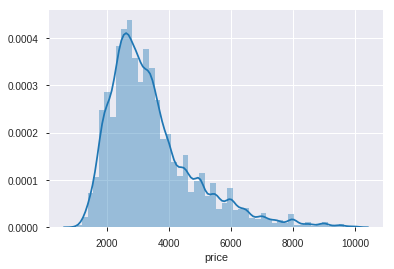

In [0]:
# plot the distribution for 'price'.
sns.distplot(df['price'])

## Longitude Feature.

In [0]:
# look at the statistics for the 'longitude' feature, it should be around '-74'.
df['longitude'].describe()

count   48,353
mean       -74
std          1
min       -118
25%        -74
50%        -74
75%        -74
max          0
Name: longitude, dtype: float64

In [0]:
# longitude should be around '-74', look at what is less.
df.query('longitude < -78')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2150,1,0,2016-04-16 02:10:48,NEWLY RENOVATED BEAUTIFUL SPACIOUS HUGE STUDIO...,"E 46th St,",40,-86,2650,"235 E 46th St,",low,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22767,1,1,2016-06-17 02:10:25,NO FEE 1 bedroom - Great Elevator - Laundry B...,"E 38th St,",34,-118,2425,"234 E 38th St,",low,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37395,1,0,2016-05-07 10:34:35,Bright UES studio apartment! Only two flights ...,E 78th St between First and York,42,-88,2000,452 E 78th St #2A (First Ave & York Ave),low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# longitude should be around '-74', look at what is more.
df.query('longitude > -70')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2787,5,6,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,0,0,9995,259 Decatur Street,low,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
14104,1,1,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn",0,0,1750,145 28 Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21715,1,1,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,0,0,1725,Van Sicklen street,low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22471,1,2,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy",0,0,4395,219 E 28th,low,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
25860,1,2,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,0,0,2950,1632 Madison Ave,medium,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
27181,1,2,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,0,0,3619,41-42 24th St,low,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34390,1,1,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,0,0,3600,247 west 87,low,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35826,1,2,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,0,0,3200,118 W 109th,low,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36448,1,1,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,0,0,3495,246 Mott St,low,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39199,1,2,2016-05-26 14:19:38,"*Mgmt is accepting June 1st, 15th, July 1st, o...",106th/Central Park,0,0,3200,21 W 106th,low,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# create a subset of the data with the longitude > -78 & price < -70.
mask = (df['longitude'] > -78) & (df['longitude'] < -70)
# create a new data frame from the mask.
df = df[mask]
# show the data frame shape.
print(df.shape)
# show the data frame with headers.
df.head()

(48339, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Longitude Distribution.

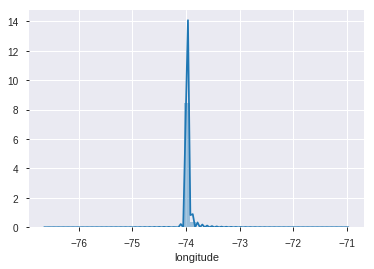

In [0]:
# plot the distribution of the 'longitude' feature.
sns.distplot(df['longitude'])

## Latitude Feature.

In [0]:
# look at the 'latitude' feature should be around 41, looks pretty good.
df['latitude'].describe()

count   48,339
mean        41
std          0
min         40
25%         41
50%         41
75%         41
max         45
Name: latitude, dtype: float64

### Latitude Distribution.

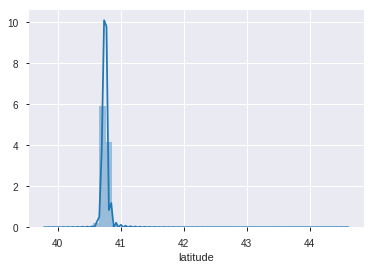

In [0]:
# plot the distribution of the 'latitude' feature.
sns.distplot(df['latitude']);

## Bathrooms Feature.

In [0]:
# look at the 'bathrooms' feature should be around 1.
df['bathrooms'].describe()

count   48,339
mean         1
std          0
min          0
25%          1
50%          1
75%          1
max         10
Name: bathrooms, dtype: float64

In [0]:
# bathrooms should be around 1, look at what is more than 4.
df.query('bathrooms > 4')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
1990,10,2,2016-04-09 04:34:31,***The building?s well-attended lobby welcomes...,W 52 St.,41,-74,3600,260 W 52 St.,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6014,4,1,2016-04-29 03:44:34,This historical elevator building is located o...,Fort Washington Avenue,41,-74,2050,690 Fort Washington Avenue,low,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# create a subset of the 'bathrooms' that are less than 5.
mask = (df['bathrooms'] < 4)
# create a new data frame with the mask.
df  = df[mask]
# show the data frame shape.
print(df.shape)
# show the data frame with headers.
df.head()

(48292, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


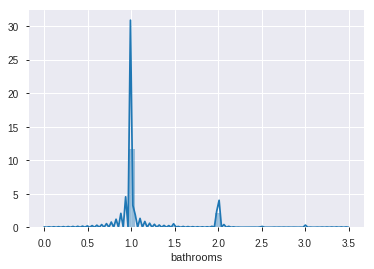

In [0]:
# show the distribution of the 'bathrooms' feature.
sns.distplot(df['bathrooms'])

### Mean of Price.

In [0]:
# import statistics library.
import statistics as sts

In [0]:
#create the 'mean' for 'price'.
price_mean = sts.mean(df['price'])
# show the price mean.
print("mean of 'price' =", price_mean)

mean of 'price' = 3434.052120434026


## Plot Bathrooms and Price.

In [0]:
# import plotly.express library.
import plotly.express as px

In [0]:
# px.scatter plot 'bathrooms' and 'price' with trendline 'ols'.
px.scatter(df, x='bathrooms', y='price', trendline='ols')

## Linear Regression.

In [0]:
# import LinearRegression from sklearn.linear_model.
from sklearn.linear_model import LinearRegression


### Bathrooms and Price.

In [0]:
# label and create LinearRegression() model.
model = LinearRegression()
# set the features to 'bathrooms'.
features = ['bathrooms']
# set the target to 'price'.
target = 'price'
# set the 'features' data to X.
X = df[features]
# set the 'target' data to Y.
y = df[target]
# .fit the X and Y data to the model.
model.fit(X, y)
# label and create them model.predict(X).
y_pred = model.predict(X)

In [0]:
# create the model coefficient.
model.coef_[0]

2111.3952779458373

In [0]:
# create the model intercept.
model.intercept_

952.0302838211869

In [0]:
# show the results, construct the line.
print('y = mx + b')
print(f'y = {model.coef_[0]} * x + {model.intercept_}')
print(f'price = {model.coef_[0]} * latitude + {model.intercept_}')

y = mx + b
y = 2111.3952779458373 * x + 952.0302838211869
price = 2111.3952779458373 * latitude + 952.0302838211869


In [0]:
# create a function to predict the 'Rent' and 'Mean of Rent' for '2' bathrooms.
def predict(bathrooms):
  y_pred = model.predict([[bathrooms]])
  return y_pred[0]
# show the results.
print("2 bathroom rent 'prediction' =", predict(2))
print("2 bathroom rent 'mean' =", sts.mean(df['price']))

2 bathroom rent 'prediction' = 5174.820839712862
2 bathroom rent 'mean' = 3434.052120434026


## Clean Code.

In [0]:
# import libraries.
import pandas as pd
import seaborn as sns
import statistics as sts 

In [0]:
# label and read in the New York City apartment rental listing data.
df = pd.read_csv('../data/renthop-nyc.csv')
# set the shape we want.
assert df.shape == (49352, 34)
# change the 'price' float column to have a , for thousands & 0 decimals. 
pd.options.display.float_format = '{:,.0f}'.format
# create a subset of the data with the price > $1000 & price < 30000.
mask = (df['price'] > 1000) & (df['price'] < 10000)
# craete a data frame from the mask.
df  = df[mask]
# create a subset of the data with the longitude > -78 & price < -70.
mask = (df['longitude'] > -78) & (df['longitude'] < -70)
# create a new data frame from the mask.
df = df[mask]
# create a subset of the 'bathrooms' that are less than 5.
mask = (df['bathrooms'] < 4)
# create a new data frame with the mask.
df  = df[mask]
# import LinearRegression from sklearn.linear_model.
from sklearn.linear_model import LinearRegression
# label and create LinearRegression() model.
model = LinearRegression()
# set the features to 'bathrooms'.
features = ['bathrooms']
# set the target to 'price'.
target = 'price'
# set the 'features' data to X.
X = df[features]
# set the 'target' data to Y.
y = df[target]
# .fit the X and Y data to the model.
model.fit(X, y)
# label and create them model.predict(X).
y_pred = model.predict(X)
# create a function to predict the 'Rent' and 'Mean of Rent' for '2' bathrooms.
def predict(bathrooms):
  # label the prediction model.
  y_pred = model.predict([[bathrooms]])
  # return the prediction.
  return y_pred[0]
# show the results.
print("2 bathroom rent 'prediction' =", predict(2))
print("2 bathroom rent 'mean' =", sts.mean(df['price']))

2 bathroom rent 'prediction' = 5174.820839712862
2 bathroom rent 'mean' = 3434.052120434026


## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
# import numpy library.
import numpy as np

In [0]:
# label and create LinearRegression() model.
model = LinearRegression()
# set all the features from the data set we want to use.
features = ['bedrooms', 'bathrooms', 'elevator',	'cats_allowed',	'hardwood_floors',	'dogs_allowed',
            'doorman',	'dishwasher',	'no_fee',	'laundry_in_building',	'fitness_center',
            'pre-war',	'laundry_in_unit',	'roof_deck',	'outdoor_space',	'dining_room',
            'high_speed_internet',	'balcony',	'swimming_pool',	'new_construction',
            'terrace',	'exclusive',	'loft',	'garden_patio',	'wheelchair_access',	'common_outdoor_space']
# set the target to 'price'.
target = 'price'
# set the 'features' data to X.
X = df[features]
# set the 'target' data to Y.
y = df[target]
# .fit the X and Y data to the model.
model.fit(X, y)
# label and create them model.predict(X).
y_pred = model.predict(X)
# show the results.
print("2 bedroom 2 bathrooms all amenities 'predicted' price =", model.predict(np.array([[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])))
print("2 bedroom 2 bathrooms no amentities 'predicted' price =", model.predict(np.array([[2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])))

2 bedroom 2 bathrooms all amenities 'predicted' price = [5095.65006586]
2 bedroom 2 bathrooms no amentities 'predicted' price = [4381.78673152]
